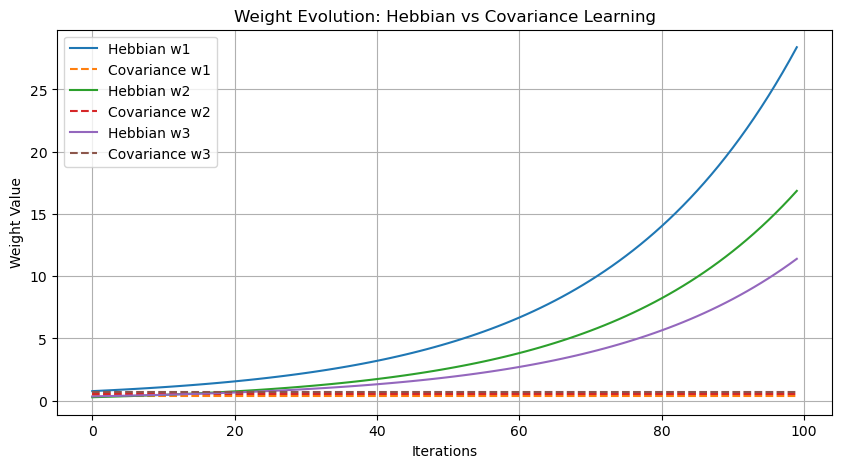

Final Hebbian learned weights: [28.39350571 16.85307592 11.3957843 ]
Final Covariance learned weights: [0.33982104 0.56802763 0.65846712]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Neuron:
    def __init__(self, num_inputs):
        self.weights = np.random.rand(num_inputs)

    def activate(self, inputs):
        return np.dot(inputs, self.weights)

    def learn_hebbian(self, inputs, learning_rate):
        activation = self.activate(inputs)
        self.weights += learning_rate * activation * inputs

    def learn_covariance(self, inputs, learning_rate):
        activation = self.activate(inputs)
        mean_input = np.mean(inputs)
        mean_output = activation  # single neuron output
        self.weights += learning_rate * (activation - mean_output) * (inputs - mean_input)

# Example usage
if __name__ == "__main__":
    num_inputs = 3
    inputs = np.array([0.5, 0.3, 0.2])
    learning_rate = 0.1
    num_iterations = 100

    # Hebbian neuron
    hebb_neuron = Neuron(num_inputs)
    hebb_weights = []

    # Covariance neuron
    cov_neuron = Neuron(num_inputs)
    cov_weights = []

    for i in range(num_iterations):
        hebb_neuron.learn_hebbian(inputs, learning_rate)
        cov_neuron.learn_covariance(inputs, learning_rate)
        hebb_weights.append(np.copy(hebb_neuron.weights))
        cov_weights.append(np.copy(cov_neuron.weights))

    # Convert to arrays for plotting
    hebb_weights = np.array(hebb_weights)
    cov_weights = np.array(cov_weights)

    # Plot comparison
    plt.figure(figsize=(10,5))
    for i in range(num_inputs):
        plt.plot(hebb_weights[:,i], label=f"Hebbian w{i+1}")
        plt.plot(cov_weights[:,i], linestyle='--', label=f"Covariance w{i+1}")
    plt.title("Weight Evolution: Hebbian vs Covariance Learning")
    plt.xlabel("Iterations")
    plt.ylabel("Weight Value")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Final output of learned weights
    print("Final Hebbian learned weights:", hebb_neuron.weights)
    print("Final Covariance learned weights:", cov_neuron.weights)
       